In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-c5dcbb01d0b9>:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/Datawithabhishek/Yes-Bank-Stock-Closing-Price-Prediction/main/data_YesBank_StockPrices.csv')


In [ ]:
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
len(df)


185

In [ ]:
df.shape


(185, 5)

In [ ]:
df.describe()


,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df['Date'] =pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


EDA
Univariate Analysis

In [ ]:
col = list(df.columns)


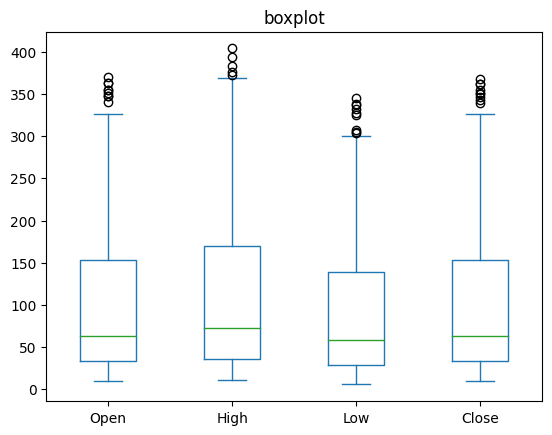

In [ ]:
ax = df[col].plot(kind='box', title='boxplot')

plt.show()

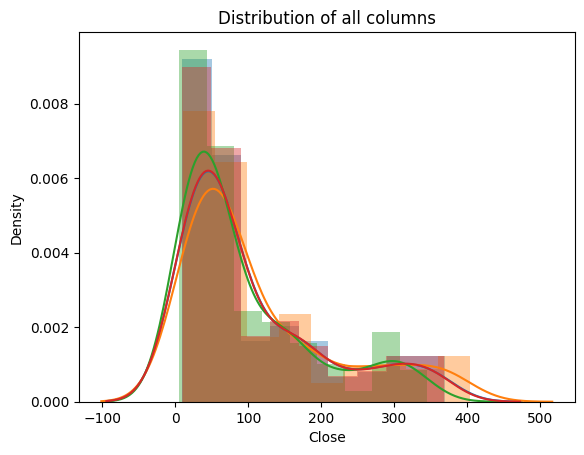

In [ ]:
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()


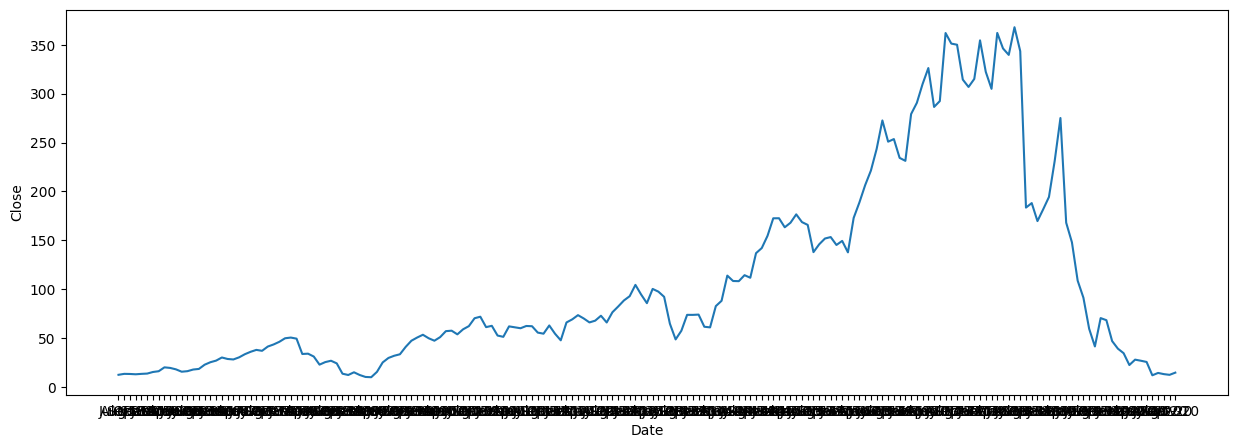

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

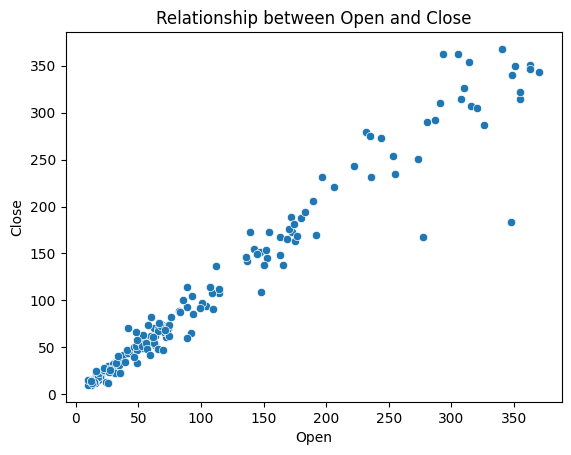

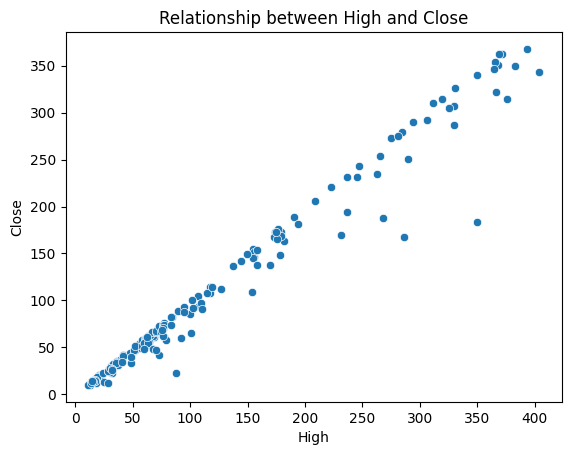

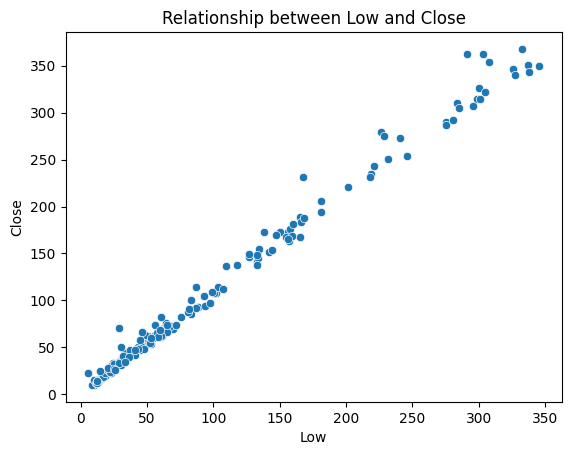

In [ ]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

TypeError: Expect data.index as DatetimeIndex

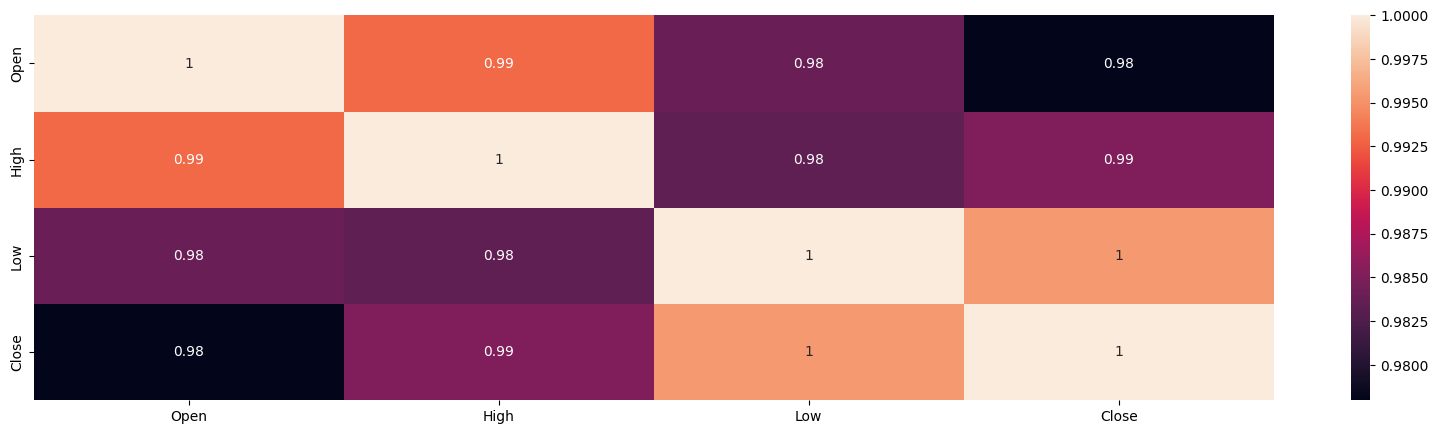

In [ ]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

In [ ]:
pw = PowerTransformer(method='box-cox',standardize=True)

In [ ]:
cf= df[list(df.columns)]

In [ ]:
df['Close']

Date
Jul-05    12.46
Aug-05    13.42
Sep-05    13.30
Oct-05    12.99
Nov-05    13.41
          ...  
Jul-20    11.95
Aug-20    14.37
Sep-20    13.15
Oct-20    12.42
Nov-20    14.67
Name: Close, Length: 185, dtype: float64

In [ ]:
kf = pd.DataFrame(pw.fit_transform(cf))

In [ ]:
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [ ]:
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

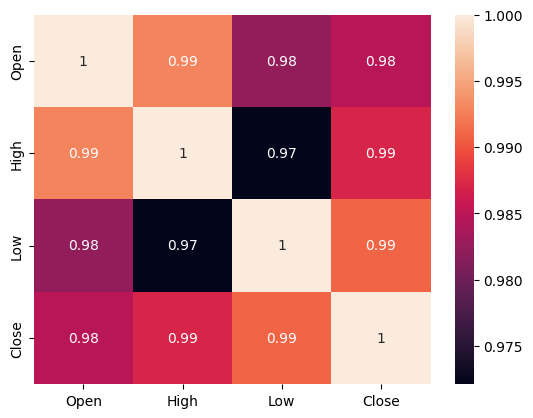

In [ ]:
sns.heatmap(kf.corr(),annot=True)

In [ ]:
col = list(kf.columns)

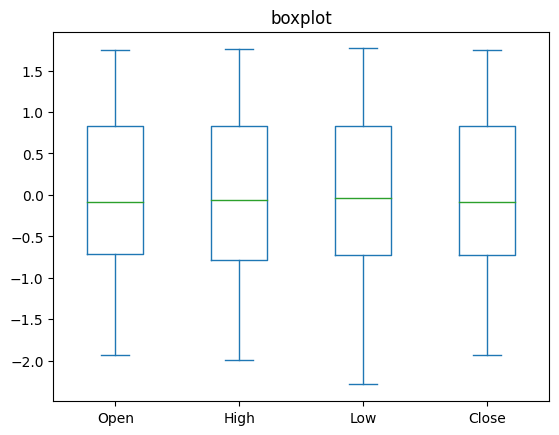

In [ ]:
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

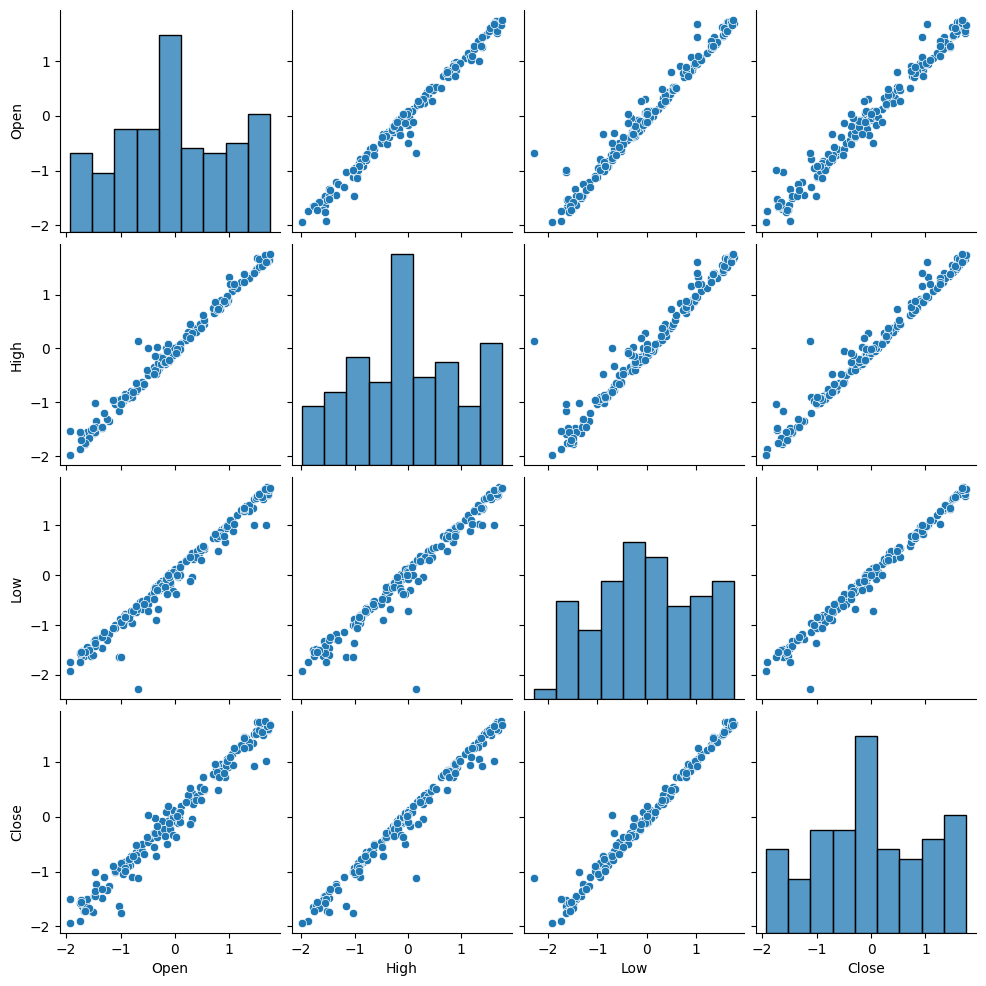

In [ ]:
sns.pairplot(kf)

In [ ]:
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [ ]:
dependent_variable = 'Close'
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [ ]:
x=df[independent_variable].values

In [ ]:
y=df[dependent_variable].values

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
linear_r2 = r2_score(y_pred,y_test)

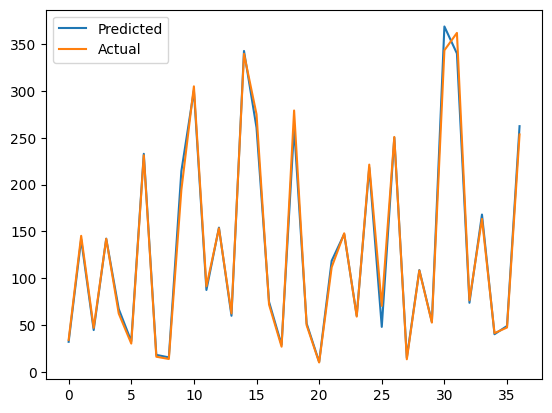

In [ ]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

In [ ]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)


In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
model.best_params_

{'n_neighbors': 2}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
r2_knn = r2_score(y_test,knn_pred)

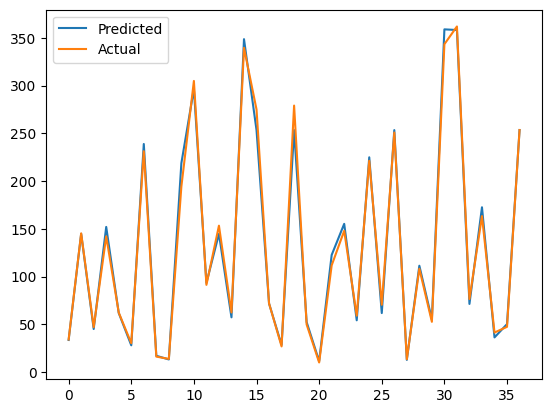

In [ ]:
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

In [ ]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [ ]:
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [50]:
rf_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 100}

In [51]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [52]:
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [53]:
rf_predict_ = rf.predict(x_test)

In [54]:
rf_r2 = r2_score(y_test,rf_predict_)

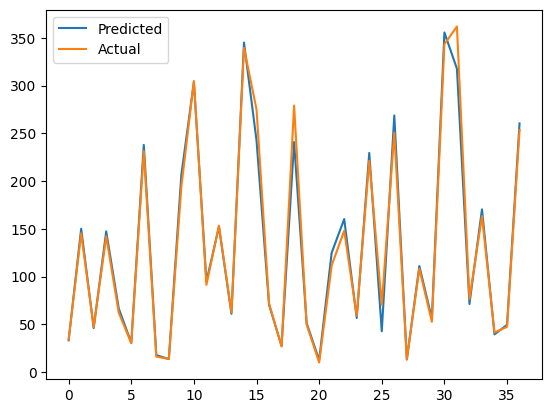

In [55]:
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()